### Project 5 (Additional) by Obianuju Igbokwe

#### Problem Statement:
To identify if a patient is suffering from Parkinson’s from the voice samples data in order to ease the screening process by avoiding clinical visits.

#### Analytical Problem / ML Problem
How many patients are we able to identify with Parkinson's Disease out of all the patients in the dataset?
Since the tests are not invasive or life threathening, plan to reduce type II error to have more recall.
Another reason to focus more on recall is that it is difficult to identify Parkinson's Disease patients <br> 
during the early stages of the disease.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:

#Import dataframe and computing libraries

import pandas as pd
import numpy as np

#Import libraries for visualisations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


#Import preprocessing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

#Import libraries for estimating our model
from sklearn.model_selection import KFold, StratifiedKFold

# Train test split
from sklearn.model_selection import train_test_split

# Import feature tuning estimator
from sklearn.model_selection import RandomizedSearchCV

#Import estimator libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline, FeatureUnion


#Import metrics libraries
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, confusion_matrix

In [3]:
from IPython.core.interactiveshell import InteractiveShell #to return multiple lines of code
InteractiveShell.ast_node_interactivity = "all"

#### Data Attributes Information:
|Attribute|Description|
|---|---|
|name |ASCII subject name and recording number|
|MDVP:Fo(Hz) |Average vocal fundamental frequency|
|MDVP:Fhi(Hz) |Maximum vocal fundamental frequency|
|MDVP:Flo(Hz) |Minimum vocal fundamental frequency|
|MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP |Several measures of variation in fundamental frequency|
|MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA |Several measures of variation in amplitude|
|NHR,HNR |Two measures of ratio of noise to tonal components in the voice|
|RPDE,D2 |Two nonlinear dynamical complexity measures|
|DFA |Signal fractal scaling exponent|
|spread1,spread2,PPE |Three nonlinear measures of fundamental frequency variation|
|**status** |**Health status of the subject (one) - Parkinson's, (zero) - healthy**|





In [4]:
#Read in data file
pcheck = pd.read_csv("parkinsons.data")
pcheck.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [5]:
#Check for the shape of the DataFrame
pcheck.shape

(195, 24)

In [6]:
#Check for data types
pcheck.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

In [7]:
#Convert the target variable to a categorical data type
pcheck.status= pcheck.status.astype('category')
pcheck.status.dtype

CategoricalDtype(categories=[0, 1], ordered=False)

In [8]:
#Check for missing values
print(pcheck.isna().sum())
print("There are no missing values in the dataset")

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64
There are no missing values in the dataset


In [9]:
pcheck.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [10]:
#Check for skewness
pcheck.skew()

MDVP:Fo(Hz)         0.591737
MDVP:Fhi(Hz)        2.542146
MDVP:Flo(Hz)        1.217350
MDVP:Jitter(%)      3.084946
MDVP:Jitter(Abs)    2.649071
MDVP:RAP            3.360708
MDVP:PPQ            3.073892
Jitter:DDP          3.362058
MDVP:Shimmer        1.666480
MDVP:Shimmer(dB)    1.999389
Shimmer:APQ3        1.580576
Shimmer:APQ5        1.798697
MDVP:APQ            2.618047
Shimmer:DDA         1.580618
NHR                 4.220709
HNR                -0.514317
RPDE               -0.143402
DFA                -0.033214
spread1             0.432139
spread2             0.144430
D2                  0.430384
PPE                 0.797491
dtype: float64

<Figure size 1440x1080 with 0 Axes>

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5]),
 <a list of 22 Text xticklabel objects>)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5]),
 <a list of 22 Text yticklabel objects>)

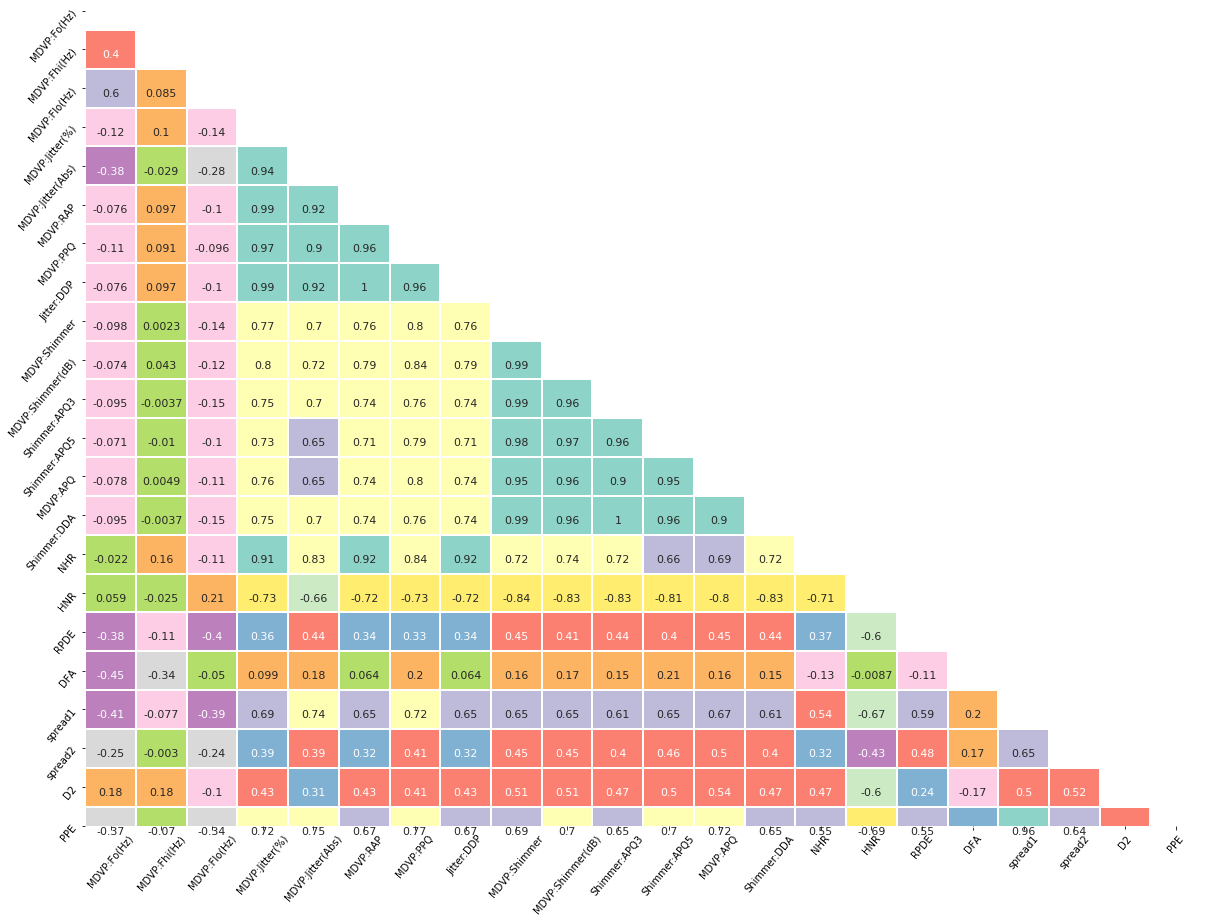

`spread1` shows a moderately high positive correlation with the label, `status`


In [11]:
# Check for correlation between attributes

plt.figure(figsize= (20,15))

# Correlation heatmap showing only lower triangle of correlations
cor = pcheck.corr()
lower_triangle = np.tril(cor, k=-1)
mask= lower_triangle==0 # to mask the upper triangle in the following heatmap

sns.heatmap(lower_triangle, cmap = 'Set3_r', annot=True, annot_kws={'size':11, "ha": 'center',"va": 'top'},
           xticklabels=cor.index, yticklabels=cor.columns, cbar=False, linewidths=1, mask=mask)
plt.xticks(rotation=50)
plt.yticks(rotation=50)
plt.show();
print("`spread1` shows a moderately high positive correlation with the label, `status`")

In [12]:
#Check for attributes with correlation higher than 0.9. One of the pairs will be dropped to prevent the 
# curse of dimensionality
cor = pcheck.corr()
cor.loc[:,:] = lower_triangle # Take the lower triangle
cor = cor.stack() #Stack the values

cor[cor>0.9]

MDVP:Jitter(Abs)  MDVP:Jitter(%)      0.935714
MDVP:RAP          MDVP:Jitter(%)      0.990276
                  MDVP:Jitter(Abs)    0.922911
MDVP:PPQ          MDVP:Jitter(%)      0.974256
                  MDVP:RAP            0.957317
Jitter:DDP        MDVP:Jitter(%)      0.990276
                  MDVP:Jitter(Abs)    0.922913
                  MDVP:RAP            1.000000
                  MDVP:PPQ            0.957319
MDVP:Shimmer(dB)  MDVP:Shimmer        0.987258
Shimmer:APQ3      MDVP:Shimmer        0.987625
                  MDVP:Shimmer(dB)    0.963198
Shimmer:APQ5      MDVP:Shimmer        0.982835
                  MDVP:Shimmer(dB)    0.973751
                  Shimmer:APQ3        0.960070
MDVP:APQ          MDVP:Shimmer        0.950083
                  MDVP:Shimmer(dB)    0.960977
                  Shimmer:APQ5        0.949146
Shimmer:DDA       MDVP:Shimmer        0.987626
                  MDVP:Shimmer(dB)    0.963202
                  Shimmer:APQ3        1.000000
             

In [13]:
# Drop `name`,  one of the measures of variation in fundamental frequency and one measure of variation in amplitude from pcheck

In [14]:

pcheck = pcheck.drop(['name','MDVP:Jitter(%)','MDVP:RAP','MDVP:PPQ','Jitter:DDP',
                      'MDVP:Shimmer','MDVP:Shimmer(dB)','Shimmer:APQ5','MDVP:APQ',
                      'Shimmer:DDA','PPE'], axis = 1)

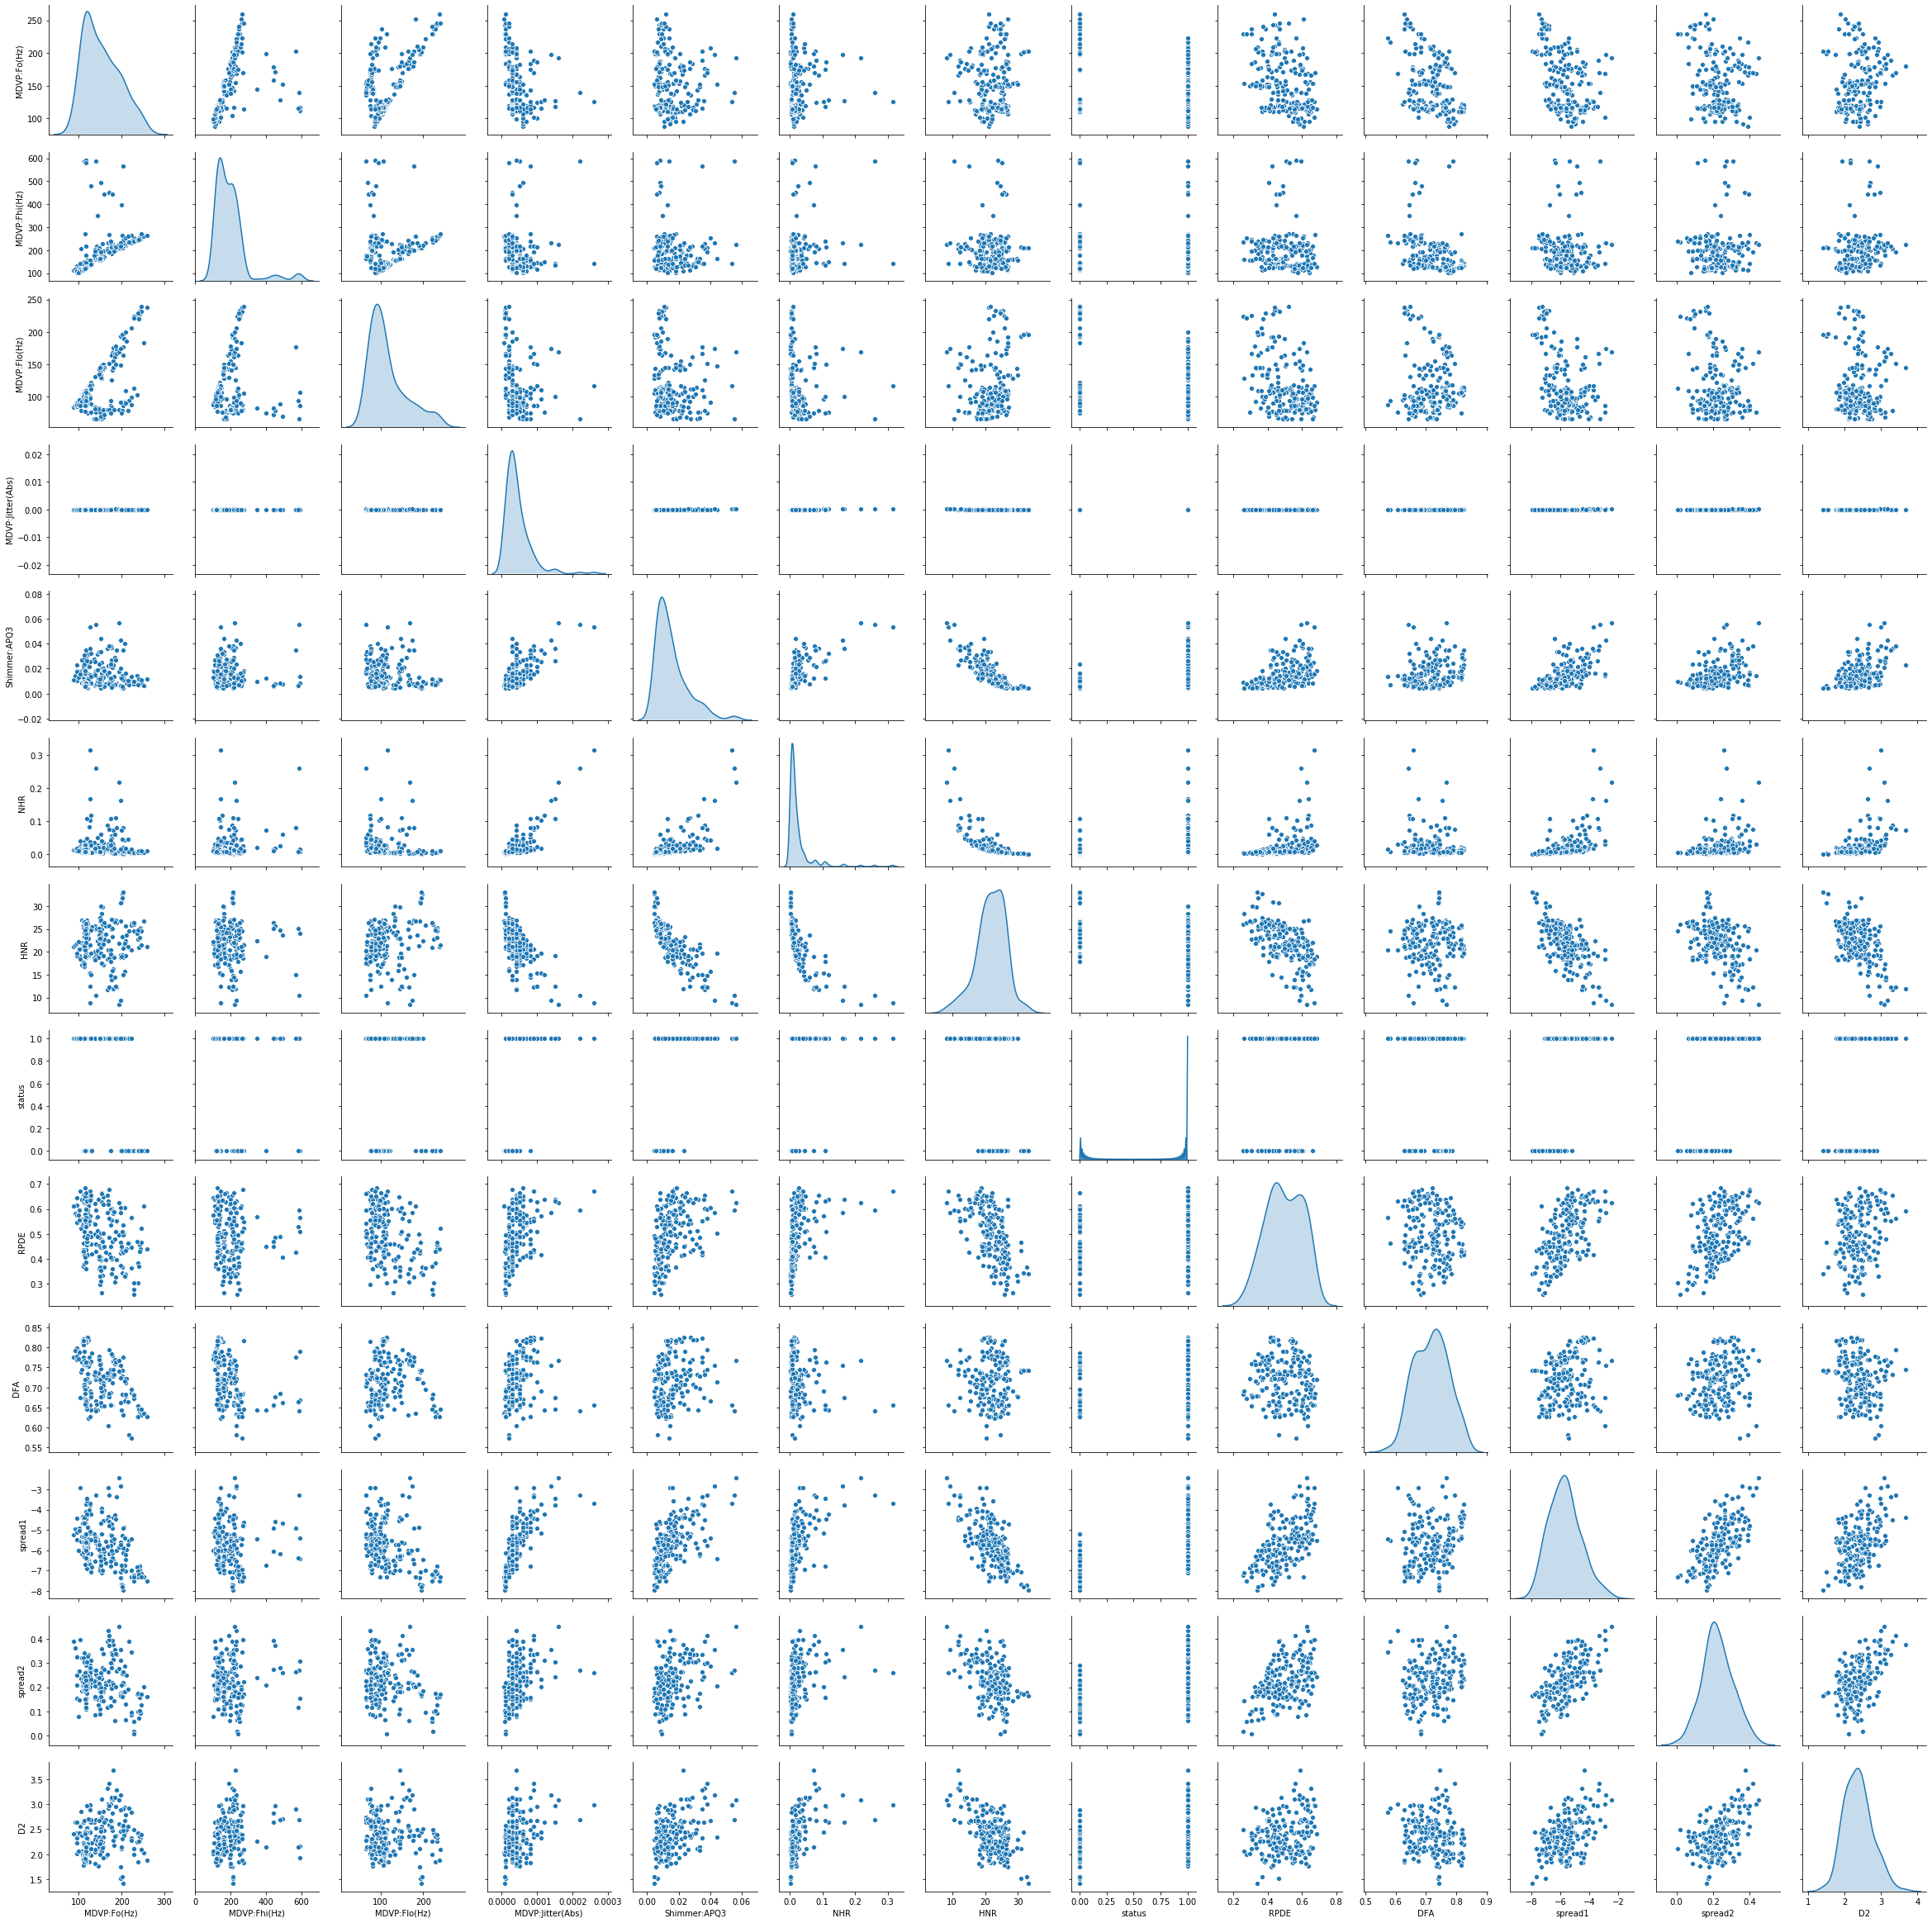

In [15]:
sns.pairplot(pcheck, diag_kind='kde')

In [16]:
pcheck.skew()

MDVP:Fo(Hz)         0.591737
MDVP:Fhi(Hz)        2.542146
MDVP:Flo(Hz)        1.217350
MDVP:Jitter(Abs)    2.649071
Shimmer:APQ3        1.580576
NHR                 4.220709
HNR                -0.514317
status             -1.187727
RPDE               -0.143402
DFA                -0.033214
spread1             0.432139
spread2             0.144430
D2                  0.430384
dtype: float64

In [17]:
pcheck.columns[:6]

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(Abs)',
       'Shimmer:APQ3', 'NHR'],
      dtype='object')

In [18]:
print(f'Use log transformation to handle skewness of the following attributes: {pcheck.columns[:6]}')
pcheck.iloc[:,1:6]= np.log(pcheck.iloc[:,1:6])
pcheck.skew()

Use log transformation to handle skewness of the following attributes: Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(Abs)',
       'Shimmer:APQ3', 'NHR'],
      dtype='object')


MDVP:Fo(Hz)         0.591737
MDVP:Fhi(Hz)        1.092015
MDVP:Flo(Hz)        0.660379
MDVP:Jitter(Abs)   -0.074896
Shimmer:APQ3        0.317575
NHR                 0.318881
HNR                -0.514317
status             -1.187727
RPDE               -0.143402
DFA                -0.033214
spread1             0.432139
spread2             0.144430
D2                  0.430384
dtype: float64

In [19]:
pcheck.shape

(195, 13)

In [20]:
#Check for outliers

In [21]:
pcheck.status.value_counts(normalize=True)
print("The target column has an imbalanced classification with 1:0 ratio of approximately 3:1.")
print("To balance the minority class(0), we will use an oversampling techniqe.")

1    0.753846
0    0.246154
Name: status, dtype: float64

The target column has an imbalanced classification with 1:0 ratio of approximately 3:1.
To balance the minority class(0), we will use an oversampling techniqe.


### 2. Build a pruned decision tree model and present the evaluation metrics

In [22]:
#Empty lists to store model results

est = [] #model
meancv =[]
tr = []
te = []
rcl = []
prc= []
f1 = []
auc = []

In [23]:
# Define the feature matrix and target arrays
X = pcheck.drop("status", axis=1)
y = pcheck.status

print(f'y_train: {y.value_counts()}')
print()
# #Split the data into train, test and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.9, random_state = 7)

newline='\n'
print(f' X_train shape: {X_train.shape}, X test shape : {X_test.shape}, X validation shape: {X_val.shape}, \
{newline}y_train shape:{ y_train.shape}, y_test shape: {y_test.shape}, y_validation shape: {y_val.shape}')




# # import imblearn for minority oversampling
from imblearn.over_sampling import SMOTE
smt = SMOTE(sampling_strategy=1, random_state=7)
X_train, y_train = smt.fit_sample(X_train, y_train)
print()
print(f' New y_train ratio: {np.bincount(y_train)}')


#Decision Tree Classifier

#Parameters for features tuning
# Criterion
criterion= ['gini', 'entropy']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 10, num = 5)]  # returns evenly spaced numbers
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2,3,4,5,6,7,8,9,10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4]



#instantiate estimators
scl = StandardScaler()
model = DecisionTreeClassifier()

param_dist = {'model__criterion': criterion,
            'model__max_depth': max_depth,
            'model__min_samples_split': min_samples_split,
            'model__min_samples_leaf': min_samples_leaf,
             } 

cv= KFold(n_splits = 5, random_state= 7)

#Build a pipeline for the model
pipe = Pipeline([("scl", scl), ("model",model)])

rSearch = RandomizedSearchCV(pipe, param_distributions=param_dist, cv=cv, random_state=7)
rSearch.fit(X_train, y_train)

#Make predictions
preds_train = rSearch.predict(X_train)
preds_val = rSearch.predict(X_val)

# Append the scores
est.append('Decision Tree')
meancv.append(rSearch.best_score_)
tr.append(rSearch.score(X_train, y_train))
te.append(rSearch.score(X_val, y_val))
rcl.append(recall_score(y_val, preds_val))
prc.append(precision_score(y_val, preds_val))
f1.append(f1_score(y_val, preds_val))
auc.append(roc_auc_score(y_val, preds_val))

y_train: 1    147
0     48
Name: status, dtype: int64

 X_train shape: (175, 12), X test shape : (39, 12), X validation shape: (20, 12), 
y_train shape:(175,), y_test shape: (39,), y_validation shape: (20,)

 New y_train ratio: [132 132]


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=7, shuffle=False),
                   error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('scl',
                                              StandardScaler(copy=True,
                                                             with_mean=True,
                                                             with_std=True)),
                                             ('model',
                                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                                     class_weight=None,
                                                                     criterion='gini',
                                                                     max_depth=None,
                                                                     max_features=None,
                                                                     max_l

In [24]:
rSearch.best_params_

{'model__min_samples_split': 8,
 'model__min_samples_leaf': 4,
 'model__max_depth': 10,
 'model__criterion': 'gini'}

0.9


<Figure size 504x360 with 0 Axes>

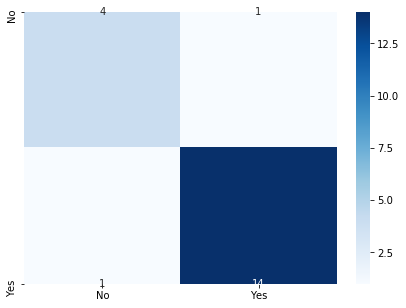

In [25]:
print(rSearch.score(X_val , y_val))
y_predict = rSearch.predict(X_val)

cm=confusion_matrix(y_val, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, cmap='Blues', annot=True ,fmt='g')

In [26]:
# Random Forest Classifier

#Parameters for features tuning

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50 , stop = 150, num = 25)]   # returns evenly spaced 10 numbers
# Number of features for every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 10, num = 5)]  # returns evenly spaced numbers
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2,3,4,5,6,7,8,9,10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4]


# Create the random grid
param_dist = {'model__n_estimators': n_estimators,
            'model__max_features': max_features,
            'model__max_depth': max_depth,
            'model__min_samples_split': min_samples_split,
            'model__min_samples_leaf': min_samples_leaf,
            }



#instantiate estimators
scl = StandardScaler()
model =RandomForestClassifier()
cv= KFold(n_splits = 5, random_state= 7)

#Build a pipeline for the model
pipe = Pipeline([("scl", scl), ("model",model)])

rSearch = RandomizedSearchCV(pipe, param_distributions=param_dist, cv=cv, random_state=7)
rSearch.fit(X_train, y_train)

#Make predictions
preds_train = rSearch.predict(X_train)
preds_val = rSearch.predict(X_val)

# Append the scores
est.append('Random Forest')
meancv.append(rSearch.best_score_)
tr.append(rSearch.score(X_train, y_train))
te.append(rSearch.score(X_val, y_val))
rcl.append(recall_score(y_val, preds_val))
prc.append(precision_score(y_val, preds_val))
f1.append(f1_score(y_val, preds_val))
auc.append(roc_auc_score(y_val, preds_val))

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=7, shuffle=False),
                   error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('scl',
                                              StandardScaler(copy=True,
                                                             with_mean=True,
                                                             with_std=True)),
                                             ('model',
                                              RandomForestClassifier(bootstrap=True,
                                                                     ccp_alpha=0.0,
                                                                     class_weight=None,
                                                                     criterion='gini',
                                                                     max_depth=None,
                                                                     max_feat

In [27]:
rSearch.best_params_

{'model__n_estimators': 150,
 'model__min_samples_split': 4,
 'model__min_samples_leaf': 2,
 'model__max_features': 'auto',
 'model__max_depth': 8}

In [28]:
# Bagging Classifier

#Parameters for features tuning

# Number of estimators
n_estimators = [int(x) for x in np.linspace(start = 50 , stop = 150, num = 25)]   # returns evenly spaced 10 numbers
# Number of features for every split
max_features = [1,2,3,4,5,6,7,8,9,10] 
# Maximum number of samples
max_samples = [int(x) for x in np.linspace(5, 10, num = 5)] 


# Create the random grid
param_dist = {'model__n_estimators': n_estimators,
            'model__max_features': max_features,
            'model__max_samples': max_samples,
            }



#instantiate estimators
scl = StandardScaler()
model =BaggingClassifier()
cv= KFold(random_state= 7)

#Build a pipeline for the model
pipe = Pipeline([("scl", scl), ("model",model)])

rSearch = RandomizedSearchCV(pipe, param_distributions=param_dist, cv=cv, random_state=7)
rSearch.fit(X_train, y_train)

#Make predictions
preds_train = rSearch.predict(X_train)
preds_val = rSearch.predict(X_val)

# Append the scores
est.append('Bagging Classifier')
meancv.append(rSearch.best_score_)
tr.append(rSearch.score(X_train, y_train))
te.append(rSearch.score(X_val, y_val))
rcl.append(recall_score(y_val, preds_val))
prc.append(precision_score(y_val, preds_val))
f1.append(f1_score(y_val, preds_val))
auc.append(roc_auc_score(y_val, preds_val))

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=7, shuffle=False),
                   error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('scl',
                                              StandardScaler(copy=True,
                                                             with_mean=True,
                                                             with_std=True)),
                                             ('model',
                                              BaggingClassifier(base_estimator=None,
                                                                bootstrap=True,
                                                                bootstrap_features=False,
                                                                max_features=1.0,
                                                                max_samples=1.0,
                                                                n_estimators=10,
       

In [29]:
# Adaboost Classifier

#Parameters for features tuning

# Number of estimators
n_estimators = [int(x) for x in np.linspace(start = 50 , stop = 150, num = 25)]   # returns evenly spaced 10 numbers
# Method of selecting samples for training each tree
learning_rate = [float(x) for x in np.linspace(0.1, 1, num = 10)]


# Create the random grid
param_dist = {'model__n_estimators': n_estimators,
            'model__learning_rate': learning_rate
            }



#instantiate estimators
scl = StandardScaler()
model = AdaBoostClassifier()
cv= KFold(random_state= 7)

#Build a pipeline for the model
pipe = Pipeline([("scl", scl), ("model",model)])

rSearch = RandomizedSearchCV(pipe, param_distributions=param_dist, cv=cv, random_state=7)
rSearch.fit(X_train, y_train)

#Make predictions
preds_train = rSearch.predict(X_train)
preds_val = rSearch.predict(X_val)

# Append the scores
est.append('AdaBoost Classifier')
meancv.append(rSearch.best_score_)
tr.append(rSearch.score(X_train, y_train))
te.append(rSearch.score(X_val, y_val))
rcl.append(recall_score(y_val, preds_val))
prc.append(precision_score(y_val, preds_val))
f1.append(f1_score(y_val, preds_val))
auc.append(roc_auc_score(y_val, preds_val))

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=7, shuffle=False),
                   error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('scl',
                                              StandardScaler(copy=True,
                                                             with_mean=True,
                                                             with_std=True)),
                                             ('model',
                                              AdaBoostClassifier(algorithm='SAMME.R',
                                                                 base_estimator=None,
                                                                 learning_rate=1.0,
                                                                 n_estimators=50,
                                                                 random_state=None))],
                                      verbose=False),
                   iid='dep

In [30]:
# GradientBoost Classifier

#Parameters for features tuning

# Number of estimators
n_estimators = [int(x) for x in np.linspace(start = 50 , stop = 150, num = 25)]   # returns evenly spaced 10 numbers
# Method of selecting samples for training each tree
learning_rate = [float(x) for x in np.linspace(0.1, 1, num = 10)]
max_depth = [int(x) for x in np.linspace(5, 10, num = 5)]  # returns evenly spaced numbers


# Create the random grid
param_dist = {'model__n_estimators': n_estimators,
            'model__learning_rate': learning_rate,
            'model__max_depth': max_depth
            }



#instantiate estimators
scl = StandardScaler()
model = GradientBoostingClassifier()
cv= KFold(random_state= 7)

#Build a pipeline for the model
pipe = Pipeline([("scl", scl), ("model",model)])

rSearch = RandomizedSearchCV(pipe, param_distributions=param_dist, cv=cv, random_state=7)
rSearch.fit(X_train, y_train)

#Make predictions
preds_train = rSearch.predict(X_train)
preds_val = rSearch.predict(X_val)

# Append the scores
est.append('Gradient Boosting Classifier')
meancv.append(rSearch.best_score_)
tr.append(rSearch.score(X_train, y_train))
te.append(rSearch.score(X_val, y_val))
rcl.append(recall_score(y_val, preds_val))
prc.append(precision_score(y_val, preds_val))
f1.append(f1_score(y_val, preds_val))
auc.append(roc_auc_score(y_val, preds_val))

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=7, shuffle=False),
                   error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('scl',
                                              StandardScaler(copy=True,
                                                             with_mean=True,
                                                             with_std=True)),
                                             ('model',
                                              GradientBoostingClassifier(ccp_alpha=0.0,
                                                                         criterion='friedman_mse',
                                                                         init=None,
                                                                         learning_rate=0.1,
                                                                         loss='deviance',
                                                     

In [32]:
# DataFrame to compare results.

results = pd.DataFrame()
results['Model'] = est
results['Mean CV Score'] = meancv
results['Training Score'] = tr
results['Testing Score'] = te
results['Recall'] = rcl
results['Precision'] = prc
results['F1 Score'] = f1
results['ROC_AUC Score'] = auc
results = results.set_index('Model')
results


,Mean CV Score,Training Score,Testing Score,Recall,Precision,F1 Score,ROC_AUC Score
Model,,,,,,,
Decision Tree,0.867779,0.962121,0.90,0.933333,0.933333,0.933333,0.866667
Random Forest,0.939623,1.000000,0.95,1.000000,0.937500,0.967742,0.900000
Bagging Classifier,0.799565,0.882576,0.85,0.933333,0.875000,0.903226,0.766667
AdaBoost Classifier,0.920755,1.000000,0.95,1.000000,0.937500,0.967742,0.900000
Gradient Boosting Classifier,0.928302,1.000000,0.85,0.866667,0.928571,0.896552,0.833333


#### Conclusion:
Both Random Forest and AdaBoost Classifiers have the best recall. Our final models are slightly overfit, but they both have high testing scores so they can be further tuned by changing parameters.